In [17]:
import os 
import csv
import cv2
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

In [18]:
data_path = 'data'
label_path='data/driving_log.csv'

In [19]:
import pandas as pd 
import numpy as np
dataset =pd.read_csv(label_path)
dataset.head()

,C:\Users\User\Desktop\New folder (2)\self_driving_car\data\IMG\center_2022_11_28_11_59_47_185.jpg,C:\Users\User\Desktop\New folder (2)\self_driving_car\data\IMG\left_2022_11_28_11_59_47_185.jpg,C:\Users\User\Desktop\New folder (2)\self_driving_car\data\IMG\right_2022_11_28_11_59_47_185.jpg,0,0.1,0.2,0.4285479
0,C:\Users\User\Desktop\New folder (2)\self_driv...,C:\Users\User\Desktop\New folder (2)\self_driv...,C:\Users\User\Desktop\New folder (2)\self_driv...,0.0,0.0,0.0,0.391008
1,C:\Users\User\Desktop\New folder (2)\self_driv...,C:\Users\User\Desktop\New folder (2)\self_driv...,C:\Users\User\Desktop\New folder (2)\self_driv...,0.0,0.0,0.0,0.326591
2,C:\Users\User\Desktop\New folder (2)\self_driv...,C:\Users\User\Desktop\New folder (2)\self_driv...,C:\Users\User\Desktop\New folder (2)\self_driv...,0.0,0.0,0.0,0.272658
3,C:\Users\User\Desktop\New folder (2)\self_driv...,C:\Users\User\Desktop\New folder (2)\self_driv...,C:\Users\User\Desktop\New folder (2)\self_driv...,0.0,0.0,0.0,0.219529
4,C:\Users\User\Desktop\New folder (2)\self_driv...,C:\Users\User\Desktop\New folder (2)\self_driv...,C:\Users\User\Desktop\New folder (2)\self_driv...,0.0,0.0,0.0,0.166744


In [20]:
dataset= dataset.values
data = dataset[:,0:3]
target = dataset[:,3]

In [21]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.1)

In [22]:
def load_image(data_dir, image_file):
    return mpimg.imread(os.path.join(data_dir, image_file.strip()))

In [23]:
test_data[0][0]

'C:\\Users\\User\\Desktop\\New folder (2)\\self_driving_car\\data\\IMG\\center_2022_11_28_12_03_30_678.jpg'

0.0


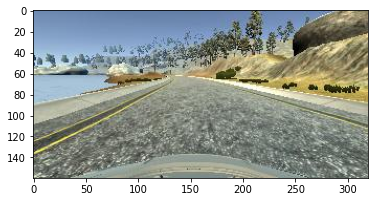

In [24]:
img = load_image(data_path,test_data[0][0])
plt.imshow(img)
steering_angle=test_target[0]
print(steering_angle)

0.0


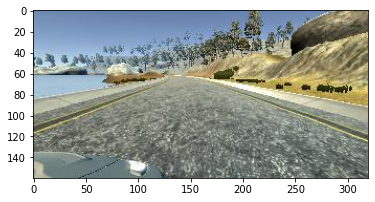

In [25]:
img = load_image(data_path,test_data[0][2])
plt.imshow(img)
steering_angle=test_target[0]
print(steering_angle)

In [26]:
image_height, image_width, image_chanels = 66, 200, 3
input_shape = (image_height,image_width, image_chanels)

0.0


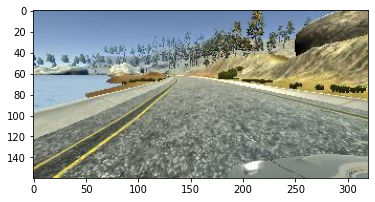

In [27]:
img = load_image(data_path,test_data[0][1])
plt.imshow(img)
steering_angle=test_target[0]
print(steering_angle)

In [28]:
def preprocess(img):
    img=img[60:-25, :, :]
    img= cv2.resize(img, (image_width,image_height), cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    return img

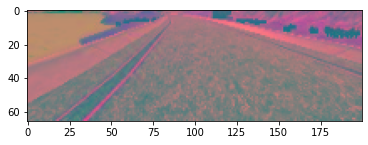

In [29]:
preprocess_img=preprocess(img)
plt.imshow(preprocess_img)

In [30]:
def random_adjust(data_dir, center, left, right, steering_angle):
    choice = np.randome.choice(3)
    if choice == 0:
        return load_image(data_dir, left), steering_angle +0.2
    elif choice == 1:
        return load_image(data_dir), steering_angle -0.2
    return load_image(data_dir,center),steering_angle

In [34]:
adjusted_img,adjusted_str = random_adjust(data_path,test_data[0][2],test_data[0][1], test_data[0][0], test_target[0])
plt.imshow(adjusted_img)
print(adjusted_str)

AttributeError: module 'numpy' has no attribute 'randome'